#### CARREGANDO BIBLIOTECAS

In [1]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

#### CARREGANDO DADOS

In [2]:
df_dados = pd.read_csv('circulardata.csv',delimiter=',')

df_dados = df_dados.sample(frac=1)

potencia = 3

df_dados['x2'] = df_dados['x']**potencia
# df_dados['y2'] = df_dados['y']**potencia

df_dados

,x,y,target,x2
290,0.233672,0.813998,C2,0.012759
360,0.404426,0.517810,C1,0.066148
330,0.378042,0.491851,C1,0.054028
304,0.384914,0.477536,C1,0.057028
334,0.335528,0.495757,C1,0.037773
...,...,...,...,...
37,0.389938,0.603757,C1,0.059291
215,0.084087,0.377271,C2,0.000595
226,0.077546,0.437791,C2,0.000466
160,0.654574,0.767079,C2,0.280463


##### VISUALIZANDO DADOS

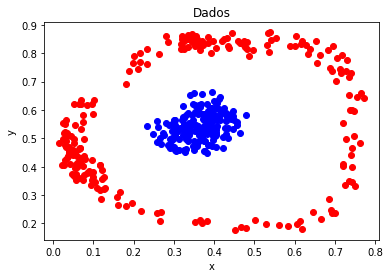

In [3]:
df_dados_c1 = df_dados[df_dados['target'] == 'C1']
df_dados_c2 = df_dados[df_dados['target'] == 'C2']

plt.scatter(df_dados_c1['x'].array,df_dados_c1['y'].array,color='blue')
plt.scatter(df_dados_c2['x'].array,df_dados_c2['y'].array,color='red')
plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### PREPARANDO DADOS

In [4]:
target = df_dados['target'].array

df_features = df_dados.drop(columns=['target'])

df_features

,x,y,x2
290,0.233672,0.813998,0.012759
360,0.404426,0.517810,0.066148
330,0.378042,0.491851,0.054028
304,0.384914,0.477536,0.057028
334,0.335528,0.495757,0.037773
...,...,...,...
37,0.389938,0.603757,0.059291
215,0.084087,0.377271,0.000595
226,0.077546,0.437791,0.000466
160,0.654574,0.767079,0.280463


/home/carlos/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/carlos/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


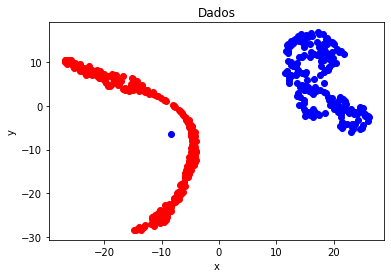

In [5]:
if 'x2' in df_dados.columns:    
    model = TSNE(n_components=2, random_state=0)
    array_red = model.fit_transform(df_features) 

    df_tsne = pd.DataFrame(array_red)

    df_tsne['target'] = target

    df_tsne_c1 = df_tsne[df_tsne['target'] == 'C1']
    df_tsne_c2 = df_tsne[df_tsne['target'] == 'C2']

    plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')
    plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')
    plt.title('Dados')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

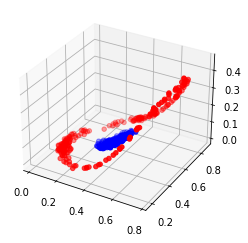

In [6]:
if 'x2' in df_dados.columns:
    ax = plt.axes(projection='3d')
    ax.scatter3D(df_dados_c1['x'].array,df_dados_c1['y'].array,df_dados_c1['x2'].array, color='blue');
    ax.scatter3D(df_dados_c2['x'].array,df_dados_c2['y'].array,df_dados_c2['x2'].array, color='red');
    plt.show()

#### TREINANDO E VALIDANDO O MODELO

In [7]:
def getModel():
    return LogisticRegression()
#     return DecisionTreeClassifier()
#     return RandomForestClassifier()

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_features.values,target,test_size=0.1)

modelo = getModel().fit(X_treino,y_treino)

score = modelo.score(X_teste,y_teste)

score

0.8333333333333334

#### VALIDAÇÃO DE FORMA MAIS ELABORADA

In [9]:
scores = cross_val_score(getModel(),df_features.values,target,cv=10)

scores.mean()

0.8943670150987224

#### MATRIZ DE CONFUSÃO

In [10]:
predicoes = cross_val_predict(getModel(), df_features.values, target, cv=10)

cm = confusion_matrix(target,predicoes,labels=["C1", "C2"])

cm_df = pd.DataFrame(cm, columns=["C1", "C2"])

cm_df

,C1,C2
0,178,18
1,26,194
